# Transfer Learning for Object Classification (MobileNet) #

In [2]:
########### Basic Data Handling Import Set ###########
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Other:
import random
import zipfile

In [ ]:
########### Tensorflow Import ###########

# ON CONDA: pip install tensorflow==2.0.0-alpha0 # If any problem -> pip uninstall numpy -> pip install numpy
import tensorflow as tf
from tensorflow.keras import layers, models

In [4]:
# !pip install tensorflow_hub --upgrade
import tensorflow_hub as hub

## Importing MobileNet model for Transfer Learning ##

In [6]:
trained_MobileNet_url ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2" #@param {type:"string"}
trained_MobileNet = tf.keras.Sequential([hub.KerasLayer(trained_MobileNet_url, input_shape=(224,224,3))])

## Testing Model ##

* Let's test the MobileNet model using a watch image.

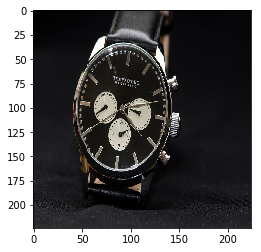

In [7]:
sample_image= tf.keras.preprocessing.image.load_img(r'Transfer Learning Data/watch.jpg', target_size = (224, 224))
plt.imshow(sample_image);

In [8]:
# Test model with watch image: 
sample_image = np.array(sample_image) / 255.0
predicted_class = trained_MobileNet.predict(np.expand_dims(sample_image, axis = 0))
# Getting the highest value class:
predicted_class = np.argmax(predicted_class)
predicted_class

827

In [9]:
# Let's discover which label is correspondent to the predicted_class:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())
print(imagenet_labels.shape)
imagenet_labels

(1001,)


array(['background', 'tench', 'goldfish', ..., 'bolete', 'ear',
       'toilet tissue'], dtype='<U30')

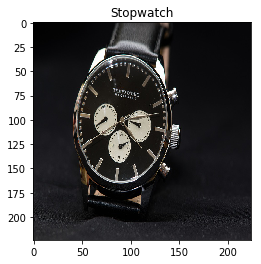

In [10]:
plt.imshow(sample_image)
predicted_class_name = imagenet_labels[predicted_class]
plt.title(predicted_class_name.title());

## Transfer Learning Use and Build Model ##

## Model Results ##

In [11]:
flowers_data_url = tf.keras.utils.get_file('flower_photos', 
                                           'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                                            untar=True)

In [12]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
flower_data = image_generator.flow_from_directory(str(flowers_data_url), target_size=(224,224), batch_size=64, shuffle=True)

Found 3670 images belonging to 5 classes.


In [13]:
for flowers_data_input_batch, flowers_data_label_batch in flower_data:
    print("Image batch shape: ", flowers_data_input_batch.shape)
    print("Label batch shape: ", flowers_data_label_batch.shape)
    break

Image batch shape:  (64, 224, 224, 3)
Label batch shape:  (64, 5)


In [14]:
predictions_batch = trained_MobileNet.predict(flowers_data_input_batch)
print(predictions_batch.shape)
predicted_class_names = imagenet_labels[np.argmax(predictions_batch, axis=-1)]
print(predicted_class_names)

(64, 1001)
['buckeye' 'bee' 'honeycomb' 'cardoon' 'face powder' 'cardoon'
 'stone wall' 'daisy' 'cauliflower' 'daisy' 'paper towel' 'wolf spider'
 "yellow lady's slipper" 'harvestman' 'cup' 'daisy' 'daisy' 'bee' 'daisy'
 'conch' 'greenhouse' 'daisy' 'coral fungus' 'cardoon' 'bee' 'bee'
 'lotion' 'daisy' 'sea anemone' 'bee' 'conch' 'sulphur butterfly'
 'sea urchin' "yellow lady's slipper" 'broom' 'bee' 'ant' 'cardoon' 'vase'
 'vase' 'green lizard' 'Persian cat' 'bee' 'daisy' 'ostrich' 'bubble'
 'feather boa' 'greenhouse' 'daisy' 'picket fence' 'artichoke' 'cardoon'
 'daisy' 'puffer' 'fig' 'hay' 'fly' 'daisy' 'hen-of-the-woods' 'bakery'
 'vase' 'pot' 'daisy' 'confectionery']


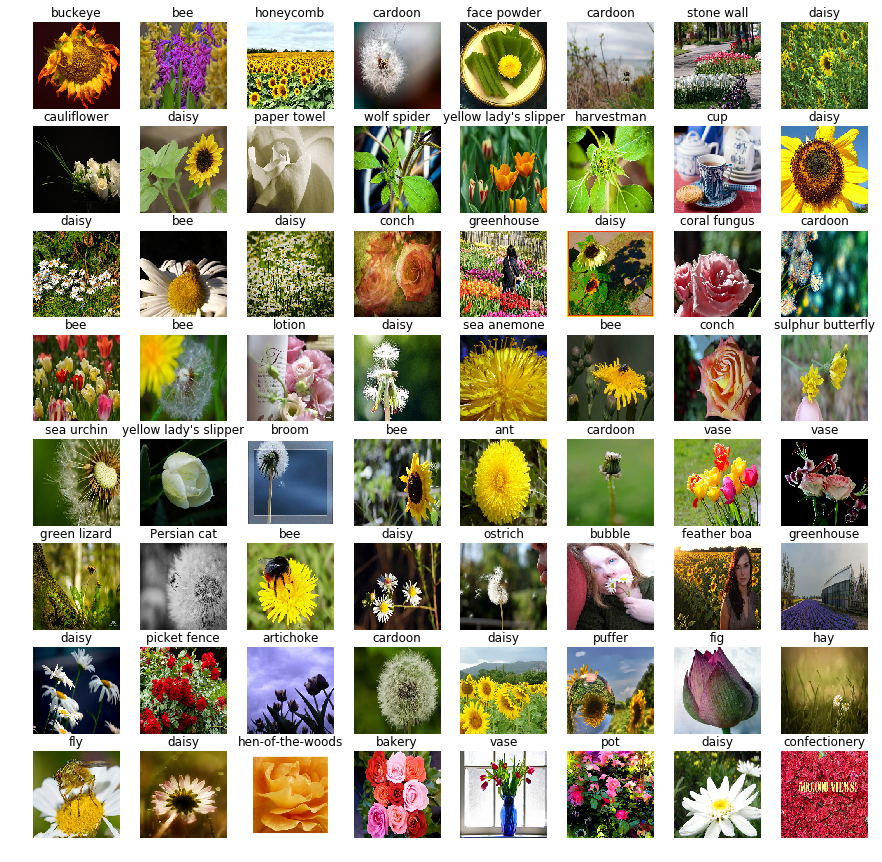

In [15]:
plt.figure(figsize=(15,15))
for n in range(64):
    plt.subplot(8,8,n+1)
    plt.imshow(flowers_data_input_batch[n])
    plt.title(predicted_class_names[n])
    plt.axis('off')

## Transfer Learning and Model Build ##

In [16]:
MobileNet_feature_extractor_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2" #@param {type:"string"}

In [24]:
MobileNet_feature_extractor_layer = hub.KerasLayer(MobileNet_feature_extractor_url, input_shape=(224, 224, 3))
MobileNet_feature_extractor_layer

In [23]:
feature_batch = MobileNet_feature_extractor_layer(flowers_data_input_batch)
MobileNet_feature_extractor_layer.trainable = False
print(feature_batch.shape)
print(flower_data.num_classes)

(64, 1280)
5


In [27]:
bing = tf.keras.layers.Dense(flower_data.num_classes, activation='softmax')
bing

In [19]:
model = tf.keras.Sequential([MobileNet_feature_extractor_layer,
                            tf.keras.layers.Dense(flower_data.num_classes, activation='softmax')])

ValueError: Input 0 of layer dense is incompatible with the layer: its rank is undefined, but the layer requires a defined rank.

In [ ]:
predictions = model(flower_data_input_batch)
predictions.shape

In [ ]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit_generator(flower_data, epochs=50)

## Model Results ##

In [ ]:
class_names = sorted(flower_data.class_indices.items(), key = lambda pair:pair[1])
print(class_names)

In [ ]:
class_names = np.array([key.title() for key, value in class_names])
print(class_names)

In [ ]:
predicted_batch = model.predict(flowers_data_input_batch)
predicted_id = np.argmax(predicted_batch, axis = -1)
predicted_label_batch = class_names[predicted_id]
print(predicted_id)
print(predicted_label_batch)

In [ ]:
label_id = np.argmax(flowers_data_label_batch, axis=-1)
label_id

In [ ]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)

for n in range(64):
    plt.subplot(8,8,n+1)
    plt.imshow(flowers_data_input_batch[n])
    color = "green" if predicted_id[n] == label_id[n] else "red"
    plt.title(predicted_label_batch[n].title(), color=color)
    plt.axis('off')